## Matrix plots of invariant matrices

Stacked matrix plots make clear that gene flow leaves a detectable difference on the values of cells shared among layers of the count matrices. 

In [1]:
import simcat
import toytree
import toyplot.svg
import numpy as np
import itertools as itt

### Generate a tree

In [2]:
tree = toytree.rtree.unittree(ntips=5, treeheight=3, seed=12345)
tree.draw(tree_style='c');

idx: 4
name: r4
dist: 0.75
support: 100
height: 0.0 0 idx: 3
name: r3
dist: 0.75
support: 100
height: 0.0 1 idx: 2
name: r2
dist: 1.5
support: 100
height: 0.0 2 idx: 1
name: r1
dist: 2.25
support: 100
height: 0.0 3 idx: 0
name: r0
dist: 3.0
support: 100
height: 0.0 4 idx: 5
name: i5
dist: 0.75
support: 1
height: 0.75 5 idx: 6
name: i6
dist: 0.75
support: 1
height: 1.5 6 idx: 7
name: i7
dist: 0.75
support: 1
height: 2.25 7 idx: 8
name: i8
dist: 0.0
support: 100
height: 3.0 8 0 1 2 3

### The order of quartet samples

In [3]:
qiter = itt.combinations(range(len(tree)), 4)
for currquart in qiter:
    print(currquart)

(0, 1, 2, 3)
(0, 1, 2, 4)
(0, 1, 3, 4)
(0, 2, 3, 4)
(1, 2, 3, 4)


### Generate matrix data sets

In [4]:
## build simulation object w/o geneflow
noflow = simcat.Model(
    tree=tree, 
    theta=0.1,
    ntests=1,
    )

# run the simulations
noflow.run()

# show the matrix shape
noflow.counts.shape

(1, 5, 16, 16)

In [5]:
## build the simulation object with geneflow
withflow = simcat.Model(
    tree=tree, 
    admixture_edges=((2, 1, 0.5, 0.7, 0.02)),
    theta=0.1,
    ntests=1,
    )

# run the simulations
withflow.run()

# show the matrix shape
withflow.counts.shape

(1, 5, 16, 16)

### Stored colormaps for plots

In [6]:
# five color diverging palette
simcat.utils.PALETTE

In [7]:
# a list of gradient colormaps from transparent to palette color
cmaps = simcat.utils.COLORMAPS
cmaps[0]

### Individual matrix plots

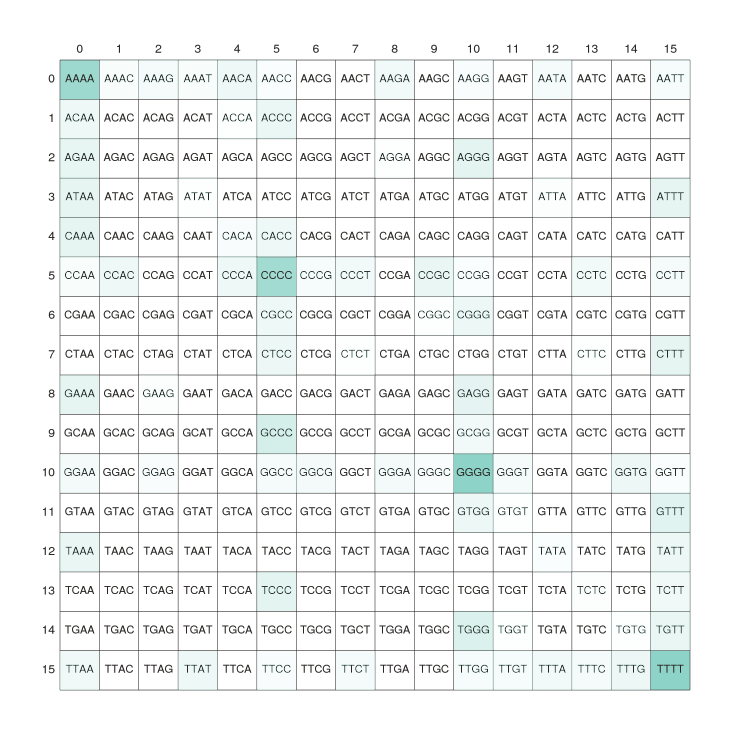

In [12]:
simcat.utils.plot_count_matrix(noflow.counts[0][4])

### Comparing matrices

In [9]:
simcat.utils.plot_quartet_matrices(tree, noflow.counts[0])

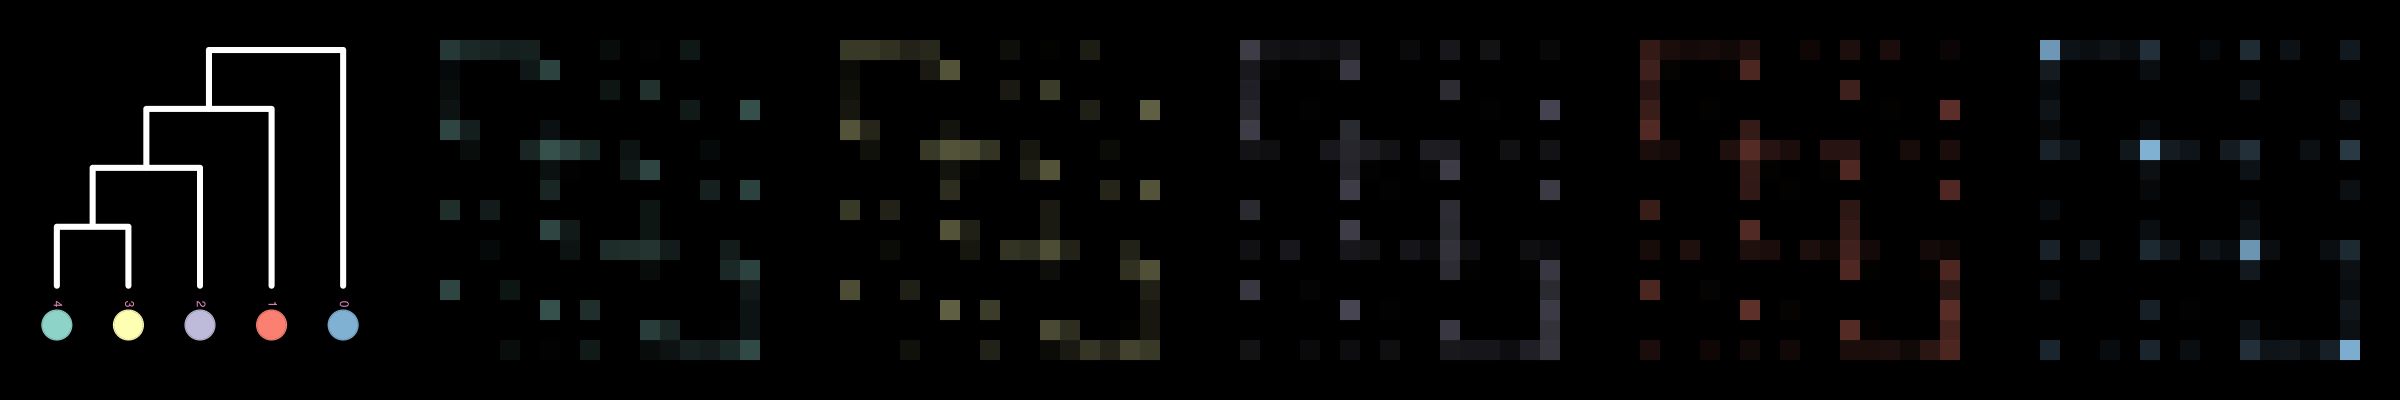

In [10]:
simcat.utils.plot_quartet_matrices(tree, withflow.counts[0])

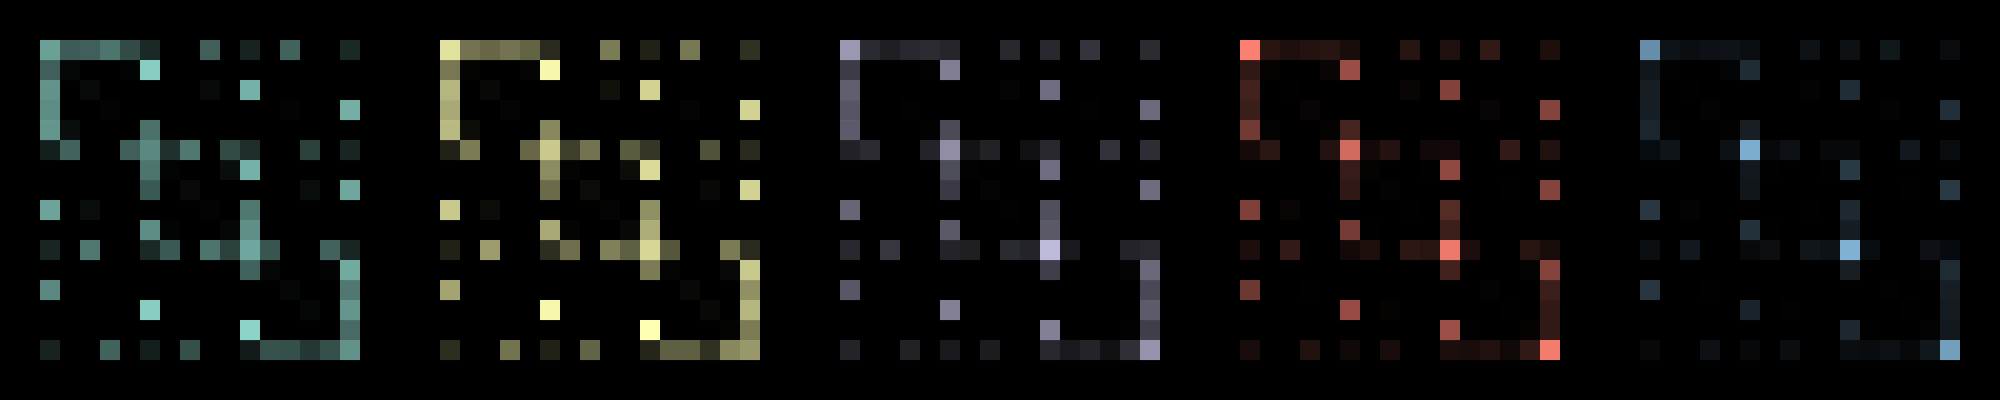

In [211]:
# no gene flow
decomposed_matrix_plot(tree)

In [212]:
# gene flow from 3 to 1
decomposed_matrix_plot(tree, (3, 1, 0.5, 0.7, 0.02))

In [213]:
# gene flow from 2 to 1
decomposed_matrix_plot(tree, (2, 1, 0.5, 0.7, 0.02))

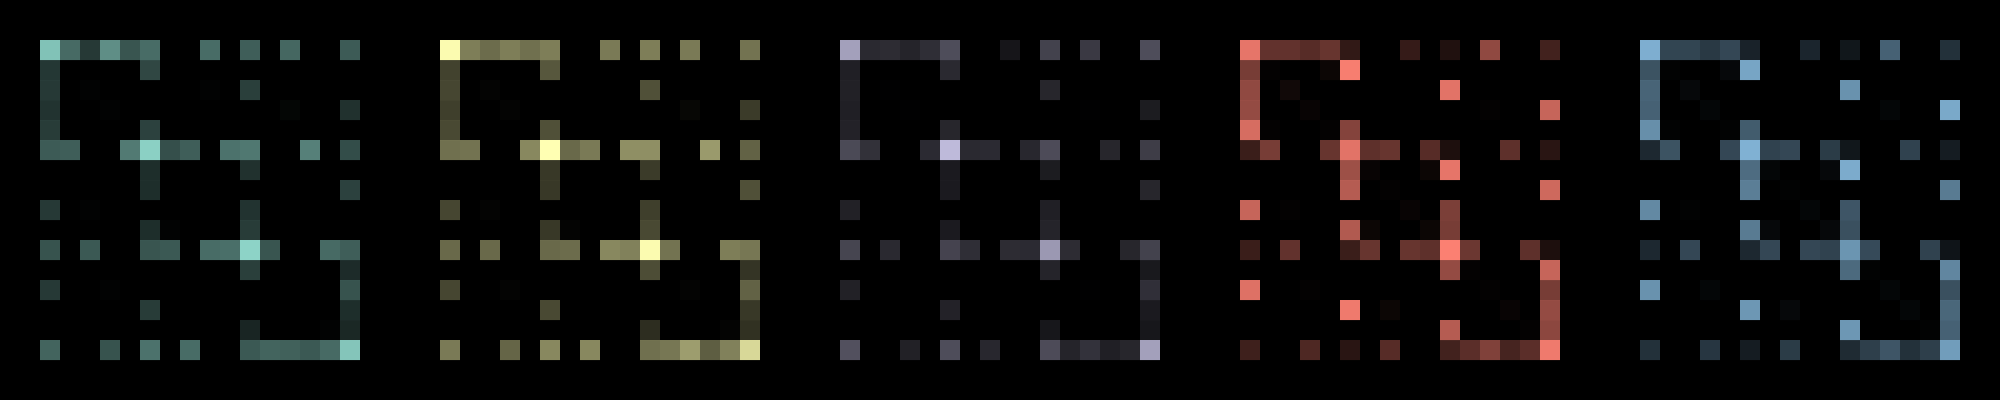

In [214]:
# gene flow from 0 to 1
decomposed_matrix_plot(tree, (0, 1, 0.5, 0.7, 0.02))

In [217]:
# gene flow from 1 to 0
decomposed_matrix_plot(tree, (1, 0, 0.5, 0.7, 0.02))

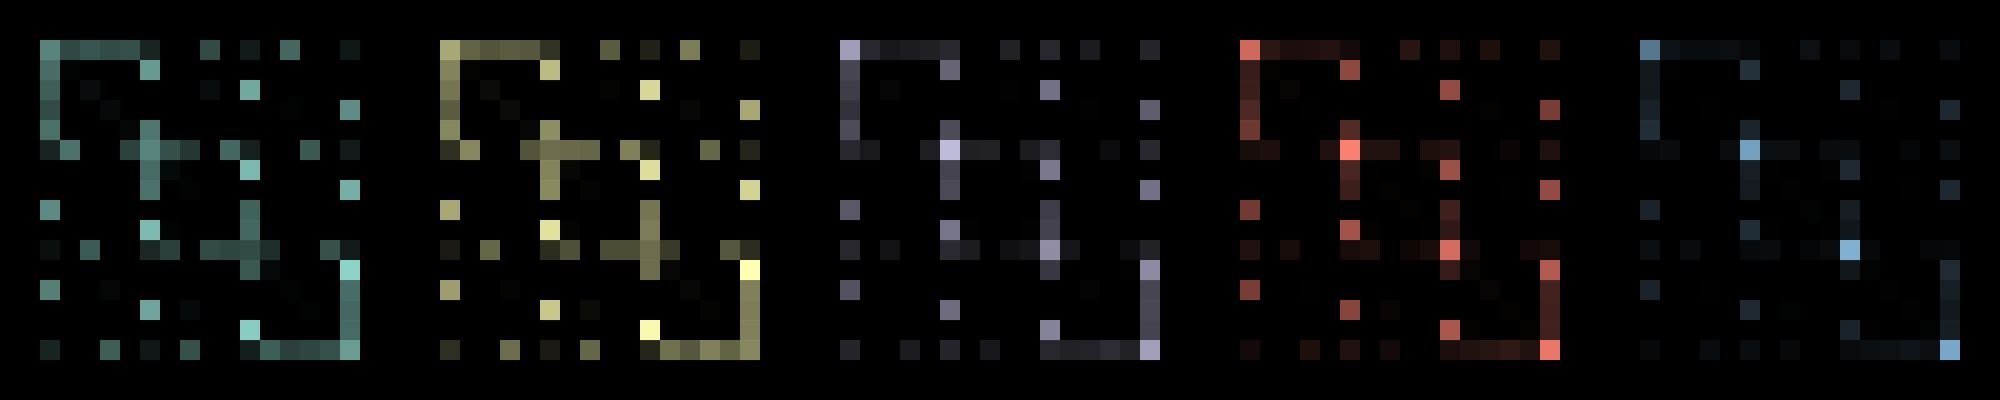

In [215]:
# gene flow from 3 to 4
decomposed_matrix_plot(tree, (3, 4, 0.5, 0.7, 0.02))

In [218]:
# gene flow from 4 to 3
decomposed_matrix_plot(tree, (4, 3, 0.5, 0.7, 0.02))

### A different topology
Wow, results are even much more clear when the topology has more structure, which makes sense. 

In [246]:
t2 = toytree.rtree.unittree(ntips=5, treeheight=3, seed=1)
c, a = t2.draw(
    tree_style='c', orient='down', edge_style={"stroke-width": '3'});
#toyplot.svg.render(c, "../figures/inv-tree2.svg")

idx: 4
name: r4
dist: 1.0
support: 100
height: 0.0 0 idx: 3
name: r3
dist: 1.0
support: 100
height: 0.0 1 idx: 2
name: r2
dist: 2.0
support: 100
height: 0.0 2 idx: 1
name: r1
dist: 1.5
support: 100
height: 0.0 3 idx: 0
name: r0
dist: 1.5
support: 100
height: 0.0 4 idx: 5
name: i5
dist: 1.0
support: 1
height: 1.0 5 idx: 6
name: i6
dist: 1.0
support: 1
height: 2.0 6 idx: 7
name: i7
dist: 1.5
support: 1
height: 1.5 7 idx: 8
name: i8
dist: 0.0
support: 100
height: 3.0 8 0 1 2 3

In [236]:
c = decomposed_matrix_plot(t2);
#toyplot.svg.render(c, "../figures/t2-inv-mats-ng.svg")

In [237]:
c = decomposed_matrix_plot(t2, (3, 1, 0.5, 0.7, 0.001));
#toyplot.svg.render(c, "../figures/t2-inv-mats-31.svg")

In [239]:
c = decomposed_matrix_plot(t2, (1, 3, 0.5, 0.7, 0.001));
#toyplot.svg.render(c, "../figures/t2-inv-mats-13.svg")

In [242]:
c = decomposed_matrix_plot(t2, (4, 1, 0.5, 0.7, 0.001));
#toyplot.svg.render(c, "../figures/t2-inv-mats-41.svg")

0.872727272727 0.436363636364 0.472727272727 0.636363636364 0.818181818182 0.618181818182 0.0 0.0 0.545454545455 0.0 0.472727272727 0.0 0.581818181818 0.0 0.0 0.436363636364 0.472727272727 0.0 0.0 0.0 0.0 0.6 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.545454545455 0.0 0.0181818181818 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.454545454545 0.0 0.0 0.0 0.0 0.0 0.454545454545 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0181818181818 0.0 0.0 0.472727272727 0.636363636364 0.0 0.0 0.0 0.0 0.6 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.581818181818 0.290909090909 0.0 0.0 0.490909090909 0.927272727273 0.6 0.672727272727 0.0 0.363636363636 0.581818181818 0.0 0.0 0.6 0.0 0.690909090909 0.0 0.0 0.0 0.0 0.0 0.454545454545 0.0 0.0 0.0 0.0 0.345454545455 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.345454545455 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.454545454545 0.436363636364 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.6 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.509090909091 0.0363636363636 0.0 0.0 0.0 0.454545454545 0.0 0.0 0.0 0.0 0.0 0.381818181818 0.0 0.436363636364 0.0 0.0 0.636363636364 0.509090909091 0.0 0.654545454545 0.709090909091 1.0 0.545454545455 0.0 0.0 0.618181818182 0.509090909091 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.472727272727 0.0 0.0 0.0 0.0 0.509090909091 0.527272727273 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.454545454545 0.0 0.0 0.0 0.0 0.0 0.454545454545 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.509090909091 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.6 0.0 0.0 0.0 0.0 0.690909090909 0.709090909091 0.0 0.0 0.636363636364 0.0 0.472727272727 0.0 0.672727272727 0.0 0.0 0.563636363636 0.690909090909 0.527272727273 0.872727272727 0.581818181818 0.818181818182 0.779816513761 0.146788990826 0.155963302752 0.137614678899 0.715596330275 0.00917431192661 0.0 0.0 0.504587155963 0.0 0.00917431192661 0.0 0.504587155963 0.0 0.0 0.00917431192661 0.100917431193 0.137614678899 0.0 0.0 0.00917431192661 0.293577981651 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.128440366972 0.0 0.155963302752 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.229357798165 0.0 0.0 0.0 0.0 0.0 0.100917431193 0.0 0.0 0.128440366972 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.247706422018 0.321100917431 0.0 0.0 0.0 0.165137614679 0.137614678899 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0183486238532 0.422018348624 0.0 0.0 0.192660550459 0.889908256881 0.128440366972 0.146788990826 0.0 0.45871559633 0.0183486238532 0.0 0.0 0.642201834862 0.0 0.00917431192661 0.0 0.0 0.0 0.0 0.0 0.119266055046 0.110091743119 0.0 0.0 0.00917431192661 0.165137614679 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0733944954128 0.0 0.100917431193 0.0 0.0 0.0 0.0 0.0 0.00917431192661 0.0 0.220183486239 0.201834862385 0.0 0.0183486238532 0.0 0.0 0.0 0.0 0.0 0.137614678899 0.0 0.165137614679 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.266055045872 0.00917431192661 0.0 0.0 0.119266055046 0.110091743119 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.412844036697 0.0 0.0 0.00917431192661 0.56880733945 0.0 0.137614678899 0.155963302752 0.963302752294 0.211009174312 0.0 0.0 0.550458715596 0.0183486238532 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.137614678899 0.100917431193 0.0 0.0 0.00917431192661 0.247706422018 0.238532110092 0.0 0.0 0.0275229357798 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0825688073394 0.0 0.0 0.146788990826 0.0 0.0 0.0 0.0 0.0 0.211009174312 0.0 0.0183486238532 0.0 0.0 0.0 0.0 0.0 0.119266055046 0.0 0.137614678899 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.293577981651 0.00917431192661 0.0 0.0 0.183486238532 0.165137614679 0.0 0.0 0.0 0.678899082569 0.0 0.00917431192661 0.0 0.56880733945 0.0 0.0 0.0183486238532 0.614678899083 0.155963302752 0.137614678899 0.119266055046 1.0 0.972727272727 0.145454545455 0.154545454545 0.136363636364 0.518181818182 0.00909090909091 0.0 0.0 0.463636363636 0.0 0.00909090909091 0.0 0.527272727273 0.0 0.0 0.00909090909091 0.1 0.136363636364 0.0 0.0 0.00909090909091 0.290909090909 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.127272727273 0.0 0.145454545455 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.236363636364 0

In [248]:
c = decomposed_matrix_plot(t2, (2, 7, 1.8, 2.0, 0.001));
toyplot.svg.render(c, "../figures/t2-inv-mats-27.svg")

In [256]:
c = decomposed_matrix_plot(t2,
    [(2, 0, 0.5, 0.7, 0.00001), (3, 1, 0.5, 0.7, 0.00001)],
    );
toyplot.svg.render(c, "../figures/t2-inv-mats-20-31.svg")

In [257]:
c = decomposed_matrix_plot(t2,
    [(2, 0, 0.5, 0.7, 0.00001), (1, 3, 0.5, 0.7, 0.00001)],
    );
toyplot.svg.render(c, "../figures/t2-inv-mats-20-13.svg")

In [262]:
c = decomposed_matrix_plot(t2,
    [(2, 1, 0.5, 0.7, 0.00001), (1, 3, 0.5, 0.7, 0.00001)],
    );
toyplot.svg.render(c, "../figures/t2-inv-mats-21-13.svg")

### Tree shape variation 

In [300]:
t3 = toytree.rtree.unittree(ntips=5, treeheight=3, seed=1)

In [301]:
t3 = t3.jitter.node_slider()
c, a = t3.draw(tree_style='c', orient='down',
               edge_style={"stroke-width": '3'});
#toyplot.svg.render(c, "../figures/inv-tree2.svg")
c = decomposed_matrix_plot(t3)

idx: 4
name: r4
dist: 0.8717568935668426
support: 100
height: 0.0 0 idx: 3
name: r3
dist: 0.8717568935668426
support: 100
height: 0.0 1 idx: 2
name: r2
dist: 1.3459986411267775
support: 100
height: 0.0 2 idx: 1
name: r1
dist: 1.4790106823566855
support: 100
height: 0.0 3 idx: 0
name: r0
dist: 1.4790106823566855
support: 100
height: 0.0 4 idx: 5
name: i5
dist: 0.47424174755993487
support: 1
height: 0.8717568935668427 5 idx: 6
name: i6
dist: 1.6540013588732225
support: 1
height: 1.3459986411267775 6 idx: 7
name: i7
dist: 1.5209893176433145
support: 1
height: 1.4790106823566855 7 idx: 8
name: i8
dist: 0.0
support: 100
height: 3.0 8 0 1 2 3

0.929577464789 0.366197183099 0.422535211268 0.253521126761 0.380281690141 0.43661971831 0.0 0.0 0.43661971831 0.0 0.464788732394 0.0 0.281690140845 0.0 0.0 0.492957746479 0.338028169014 0.0 0.0 0.0 0.0 0.366197183099 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.521126760563 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.408450704225 0.0 0.0 0.0 0.0 0.0 0.394366197183 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.380281690141 0.366197183099 0.0 0.0 0.0 0.0 0.380281690141 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.450704225352 0.549295774648 0.0 0.0 0.380281690141 0.943661971831 0.352112676056 0.380281690141 0.0 0.338028169014 0.507042253521 0.0 0.0 0.281690140845 0.0 0.521126760563 0.0 0.0 0.0 0.0 0.0 0.422535211268 0.0 0.0 0.0 0.0 0.30985915493 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.422535211268 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.408450704225 0.366197183099 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0140845070423 0.0 0.422535211268 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.535211267606 0.0 0.0 0.0 0.0 0.521126760563 0.0 0.0 0.0 0.0 0.0 0.507042253521 0.0 0.380281690141 0.0 0.0 0.464788732394 0.43661971831 0.0 0.338028169014 0.323943661972 0.887323943662 0.366197183099 0.0 0.0 0.338028169014 0.43661971831 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.366197183099 0.0 0.0 0.0 0.0 0.422535211268 0.380281690141 0.0 0.0 0.0140845070423 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.30985915493 0.0 0.0 0.0 0.0 0.0 0.43661971831 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.295774647887 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.338028169014 0.0140845070423 0.0 0.0 0.0 0.422535211268 0.394366197183 0.0 0.0 0.408450704225 0.0 0.492957746479 0.0 0.380281690141 0.0 0.0 0.521126760563 0.422535211268 0.535211267606 0.338028169014 0.450704225352 1.0 0.75 0.421875 0.578125 0.4375 0.421875 0.484375 0.0 0.0 0.46875 0.0 0.53125 0.0 0.328125 0.0 0.0 0.53125 0.375 0.0 0.0 0.0 0.0 0.40625 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.578125 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.453125 0.0 0.0 0.0 0.0 0.0 0.4375 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.421875 0.40625 0.0 0.0 0.0 0.0 0.421875 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.546875 0.5625 0.0 0.0 0.5625 0.9375 0.34375 0.4375 0.0 0.34375 0.59375 0.0 0.0 0.34375 0.0 0.546875 0.0 0.0 0.0 0.0 0.0 0.46875 0.0 0.0 0.0 0.0 0.34375 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.46875 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.453125 0.40625 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.015625 0.0 0.46875 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.59375 0.0 0.0 0.0 0.0 0.578125 0.0 0.0 0.0 0.0 0.0 0.578125 0.0 0.40625 0.0 0.0 0.53125 0.46875 0.0 0.53125 0.421875 0.8125 0.359375 0.0 0.0 0.34375 0.515625 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.40625 0.0 0.0 0.0 0.0 0.46875 0.421875 0.0 0.0 0.015625 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.34375 0.0 0.0 0.0 0.0 0.0 0.484375 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.328125 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.375 0.015625 0.0 0.0 0.0 0.46875 0.46875 0.0 0.0 0.421875 0.0 0.578125 0.0 0.390625 0.0 0.0 0.609375 0.4375 0.453125 0.609375 0.515625 1.0 0.922077922078 0.298701298701 0.324675324675 0.324675324675 0.285714285714 0.454545454545 0.0 0.0 0.220779220779 0.0 0.597402597403 0.0 0.207792207792 0.0 0.0 0.480519480519 0.311688311688 0.0 0.0 0.0 0.0 0.337662337662 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.480519480519 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.376623376623 0.0 0.0 0.0 0.0 0.0 0.363636363636 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.350649350649 0.337662337662 0.0 0.0 0.0 0.0 0.350649350649 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.454545454545 0.311688311688 0.0 0.0 0.467532467532 0.948051948052 0.272727272727 0.25974025974 0.0 0.285714285714 0.506493506494 0.0 0.0 0.272727272727 0.0 0.558441558442 0.0 0.0 0.0 0.0 0.0 0.38961038961 0.0 0.0 0.0 0.0 0.285714285714 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.38961038961 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.376623376623 0.350649350649 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.38961038961 0.0 0.0 0.0 0.0 0.0 0.0 0

In [302]:
t3 = t3.jitter.node_slider()
c, a = t3.draw(tree_style='c', orient='down',
               edge_style={"stroke-width": '3'});
#toyplot.svg.render(c, "../figures/inv-tree2.svg")
c = decomposed_matrix_plot(t3)

idx: 4
name: 4
dist: 1.288440565414947
support: 100
height: 0.0 0 idx: 3
name: 3
dist: 1.288440565414947
support: 100
height: 0.0 1 idx: 2
name: 2
dist: 1.4558277123205243
support: 100
height: 0.0 2 idx: 1
name: 1
dist: 0.6352506277324985
support: 100
height: 0.0 3 idx: 0
name: 0
dist: 0.6352506277324985
support: 100
height: 0.0 4 idx: 5
name: i5
dist: 0.16738714690557743
support: 1
height: 1.288440565414947 5 idx: 6
name: i6
dist: 1.5441722876794757
support: 1
height: 1.4558277123205243 6 idx: 7
name: i7
dist: 2.3647493722675015
support: 1
height: 0.6352506277324985 7 idx: 8
name: i8
dist: 0.0
support: 100
height: 3.0 8 0 1 2 3

1.0 0.341463414634 0.40243902439 0.268292682927 0.280487804878 0.585365853659 0.0 0.0 0.353658536585 0.0 0.69512195122 0.0 0.390243902439 0.0 0.0 0.512195121951 0.170731707317 0.0 0.0 0.0 0.0 0.292682926829 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.219512195122 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.207317073171 0.0 0.0 0.0 0.0 0.0 0.231707317073 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.207317073171 0.207317073171 0.0 0.0 0.0 0.0 0.19512195122 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.487804878049 0.414634146341 0.0 0.0 0.268292682927 0.817073170732 0.341463414634 0.426829268293 0.0 0.390243902439 0.548780487805 0.0 0.0 0.378048780488 0.0 0.512195121951 0.0 0.0 0.0 0.0 0.0 0.231707317073 0.0 0.0 0.0 0.0 0.317073170732 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.146341463415 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.170731707317 0.30487804878 0.0 0.0121951219512 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.231707317073 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.207317073171 0.0 0.0 0.0 0.0 0.256097560976 0.0 0.0 0.0 0.0 0.0 0.536585365854 0.0 0.353658536585 0.0 0.0 0.646341463415 0.463414634146 0.0 0.451219512195 0.353658536585 0.878048780488 0.292682926829 0.0 0.0 0.365853658537 0.560975609756 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.134146341463 0.0 0.0 0.0 0.0 0.231707317073 0.280487804878 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.317073170732 0.0 0.0 0.0 0.0 0.0 0.219512195122 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.256097560976 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.19512195122 0.0 0.0 0.0 0.0 0.329268292683 0.5 0.0 0.0 0.390243902439 0.0 0.670731707317 0.0 0.329268292683 0.0 0.0 0.487804878049 0.292682926829 0.341463414634 0.353658536585 0.280487804878 0.853658536585 0.866666666667 0.493333333333 0.466666666667 0.373333333333 0.32 0.626666666667 0.0 0.0 0.413333333333 0.0 0.733333333333 0.0 0.413333333333 0.0 0.0 0.573333333333 0.186666666667 0.0 0.0 0.0 0.0 0.32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.24 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.226666666667 0.0 0.0 0.0 0.0 0.0 0.253333333333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.226666666667 0.226666666667 0.0 0.0 0.0 0.0 0.213333333333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.6 0.386666666667 0.0 0.0 0.333333333333 0.986666666667 0.36 0.346666666667 0.0 0.466666666667 0.56 0.0 0.0 0.4 0.0 0.573333333333 0.0 0.0 0.0 0.0 0.0 0.253333333333 0.0 0.0 0.0 0.0 0.346666666667 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.16 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.186666666667 0.346666666667 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.253333333333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.226666666667 0.0 0.0 0.0 0.0 0.28 0.0 0.0 0.0 0.0 0.0 0.6 0.0 0.373333333333 0.0 0.0 0.72 0.493333333333 0.0 0.333333333333 0.426666666667 1.0 0.4 0.0 0.0 0.413333333333 0.6 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.146666666667 0.0 0.0 0.0 0.0 0.253333333333 0.306666666667 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.346666666667 0.0 0.0 0.0 0.0 0.0 0.24 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.28 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.213333333333 0.0 0.0 0.0 0.0 0.36 0.546666666667 0.0 0.0 0.426666666667 0.0 0.693333333333 0.0 0.4 0.0 0.0 0.52 0.333333333333 0.293333333333 0.453333333333 0.36 0.893333333333 0.840909090909 0.386363636364 0.352272727273 0.306818181818 0.295454545455 0.568181818182 0.0 0.0 0.352272727273 0.0 0.670454545455 0.0 0.227272727273 0.0 0.0 0.5 0.159090909091 0.0 0.0 0.0 0.0 0.272727272727 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.204545454545 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.193181818182 0.0 0.0 0.0 0.0 0.0 0.215909090909 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.193181818182 0.193181818182 0.0 0.0 0.0 0.0 0.181818181818 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.465909090909 0.238636363636 0.0 0.0 0.329545454545 1.0 0.284090909091 0.25 0.0 0.329545454545 0.5 0.0 0.0 0.340909090909 0.0 0.534090909091 0.0 0.0 0.0 0.0 0.0 0.215909090909 0.0 0.0 0.0 0.0 0.295454545455 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.136363636

In [306]:
t3 = t3.jitter.node_slider()
c, a = t3.draw(tree_style='d', orient='down',
               edge_style={"stroke-width": '3'});
#toyplot.svg.render(c, "../figures/inv-tree2.svg")
c = decomposed_matrix_plot(t3)

0 1 2 3 4

0.928571428571 0.510204081633 0.316326530612 0.418367346939 0.540816326531 0.367346938776 0.0 0.0 0.448979591837 0.0 0.34693877551 0.0 0.316326530612 0.0 0.0 0.265306122449 0.102040816327 0.0102040816327 0.0 0.0 0.0 0.15306122449 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.163265306122 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.132653061224 0.0 0.0 0.0 0.0 0.0 0.132653061224 0.0 0.0 0.0102040816327 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0918367346939 0.102040816327 0.0102040816327 0.0 0.0 0.0 0.0918367346939 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.408163265306 0.459183673469 0.0 0.0 0.255102040816 0.714285714286 0.418367346939 0.448979591837 0.0 0.387755102041 0.34693877551 0.0 0.0 0.275510204082 0.0 0.367346938776 0.0 0.0 0.0 0.0 0.0 0.122448979592 0.0 0.0 0.0 0.0 0.112244897959 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.112244897959 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.102040816327 0.0918367346939 0.0 0.0102040816327 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.142857142857 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.173469387755 0.0 0.0 0.0 0.0 0.0918367346939 0.0 0.0 0.0 0.0 0.0 0.387755102041 0.0 0.397959183673 0.0 0.0 0.408163265306 0.438775510204 0.0 0.438775510204 0.367346938776 0.948979591837 0.489795918367 0.0 0.0 0.489795918367 0.357142857143 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.142857142857 0.0 0.0 0.0 0.0 0.0816326530612 0.0612244897959 0.0 0.0 0.0102040816327 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.132653061224 0.0 0.0 0.0 0.0 0.0 0.030612244898 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.112244897959 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.163265306122 0.0 0.0 0.0 0.0 0.132653061224 0.336734693878 0.0 0.0 0.408163265306 0.0 0.316326530612 0.0 0.316326530612 0.0 0.0 0.367346938776 0.448979591837 0.418367346939 0.30612244898 0.397959183673 1.0 0.976470588235 0.623529411765 0.517647058824 0.388235294118 0.635294117647 0.411764705882 0.0 0.0 0.505882352941 0.0 0.411764705882 0.0 0.376470588235 0.0 0.0 0.294117647059 0.129411764706 0.0 0.0 0.0 0.0 0.176470588235 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.188235294118 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.152941176471 0.0 0.0 0.0 0.0 0.0 0.164705882353 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.105882352941 0.117647058824 0.0117647058824 0.0 0.0 0.0 0.105882352941 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.458823529412 0.541176470588 0.0 0.0 0.411764705882 0.823529411765 0.423529411765 0.458823529412 0.0 0.470588235294 0.376470588235 0.0 0.0 0.329411764706 0.0 0.411764705882 0.0 0.0 0.0 0.0 0.0 0.141176470588 0.0 0.0 0.0 0.0 0.129411764706 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.129411764706 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.117647058824 0.105882352941 0.0 0.0117647058824 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.164705882353 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 0.0 0.0 0.0 0.0 0.105882352941 0.0 0.0 0.0 0.0 0.0 0.470588235294 0.0 0.435294117647 0.0 0.0 0.482352941176 0.494117647059 0.0 0.564705882353 0.529411764706 1.0 0.494117647059 0.0 0.0 0.564705882353 0.411764705882 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.164705882353 0.0 0.0 0.0 0.0 0.0941176470588 0.0705882352941 0.0 0.0 0.0117647058824 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.152941176471 0.0 0.0 0.0 0.0 0.0 0.0352941176471 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.129411764706 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.188235294118 0.0 0.0 0.0 0.0 0.152941176471 0.411764705882 0.0 0.0 0.447058823529 0.0 0.376470588235 0.0 0.352941176471 0.0 0.0 0.435294117647 0.505882352941 0.517647058824 0.423529411765 0.505882352941 1.0 1.0 0.267716535433 0.299212598425 0.157480314961 0.251968503937 0.425196850394 0.0 0.0 0.188976377953 0.0 0.322834645669 0.0 0.228346456693 0.0 0.0 0.299212598425 0.0787401574803 0.0 0.0 0.0 0.00787401574803 0.11811023622 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.125984251969 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.102362204724 0.0 0.0 0.0 0.0 0.0 0.102362204724 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00787401574803 0.0 0.0 0.0708661417323 0.0787401574803 0.0 0.0 0.0 0.0 0.07874

In [349]:
t3 = t3.jitter.node_slider()
decomposed_plot2(t3)
t3 = t3.jitter.node_slider()
decomposed_plot2(t3)
t3 = t3.jitter.node_slider()
decomposed_plot2(t3)
t3 = t3.jitter.node_slider()
decomposed_plot2(t3)
t3 = t3.jitter.node_slider()
decomposed_plot2(t3)
t3 = t3.jitter.node_slider()
decomposed_plot2(t3)
t3 = t3.jitter.node_slider()
decomposed_plot2(t3)
t3 = t3.jitter.node_slider()
decomposed_plot2(t3)
t3 = t3.jitter.node_slider()
decomposed_plot2(t3)
t3 = t3.jitter.node_slider()
decomposed_plot2(t3)

1.0 0.333333333333 0.416666666667 0.277777777778 0.305555555556 0.277777777778 0.0 0.0 0.361111111111 0.0 0.305555555556 0.0 0.25 0.0 0.0 0.305555555556 0.583333333333 0.0 0.0 0.0 0.0277777777778 0.666666666667 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.5 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.416666666667 0.0 0.0 0.0 0.0 0.0 0.583333333333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0277777777778 0.0 0.0 0.388888888889 0.5 0.0 0.0 0.0 0.0 0.444444444444 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.444444444444 0.388888888889 0.0 0.0 0.472222222222 0.916666666667 0.361111111111 0.333333333333 0.0 0.361111111111 0.194444444444 0.0 0.0 0.416666666667 0.0 0.194444444444 0.0 0.0 0.0 0.0 0.0 0.388888888889 0.0 0.0 0.0 0.0 0.527777777778 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.555555555556 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.444444444444 0.555555555556 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.5 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.611111111111 0.0 0.0 0.0 0.0277777777778 0.388888888889 0.0 0.0 0.0 0.0 0.0 0.361111111111 0.0 0.444444444444 0.0 0.0 0.416666666667 0.416666666667 0.0 0.277777777778 0.361111111111 0.888888888889 0.222222222222 0.0 0.0 0.5 0.305555555556 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.694444444444 0.0555555555556 0.0 0.0 0.0 0.222222222222 0.472222222222 0.0 0.0 0.0277777777778 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.361111111111 0.0 0.0 0.0 0.0 0.0 0.444444444444 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.861111111111 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.583333333333 0.0555555555556 0.0 0.0 0.0 0.361111111111 0.277777777778 0.0 0.0 0.333333333333 0.0 0.25 0.0 0.166666666667 0.0 0.0 0.361111111111 0.25 0.25 0.416666666667 0.472222222222 0.611111111111 0.647058823529 0.470588235294 0.558823529412 0.470588235294 0.323529411765 0.294117647059 0.0 0.0 0.411764705882 0.0 0.294117647059 0.0 0.205882352941 0.0 0.0 0.382352941176 0.617647058824 0.0 0.0 0.0 0.0 0.735294117647 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.529411764706 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.441176470588 0.0 0.0 0.0 0.0 0.0 0.617647058824 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0294117647059 0.0 0.0 0.411764705882 0.529411764706 0.0 0.0 0.0 0.0 0.470588235294 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.470588235294 0.411764705882 0.0 0.0 0.382352941176 1.0 0.470588235294 0.352941176471 0.0 0.382352941176 0.205882352941 0.0 0.0 0.470588235294 0.0 0.176470588235 0.0 0.0 0.0 0.0 0.0 0.411764705882 0.0 0.0 0.0 0.0 0.558823529412 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.588235294118 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.470588235294 0.588235294118 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.529411764706 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.647058823529 0.0 0.0 0.0 0.0294117647059 0.411764705882 0.0 0.0 0.0 0.0 0.0 0.352941176471 0.0 0.5 0.0 0.0 0.323529411765 0.558823529412 0.0 0.558823529412 0.441176470588 0.5 0.352941176471 0.0 0.0 0.529411764706 0.323529411765 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.764705882353 0.0294117647059 0.0 0.0 0.0 0.235294117647 0.5 0.0 0.0 0.0294117647059 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.382352941176 0.0 0.0 0.0 0.0 0.0 0.470588235294 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0294117647059 0.0 0.882352941176 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.617647058824 0.0588235294118 0.0 0.0 0.0 0.382352941176 0.294117647059 0.0 0.0 0.352941176471 0.0 0.205882352941 0.0 0.235294117647 0.0 0.0 0.382352941176 0.264705882353 0.205882352941 0.235294117647 0.588235294118 0.823529411765 0.632653061224 0.224489795918 0.244897959184 0.30612244898 0.142857142857 0.30612244898 0.0 0.0 0.183673469388 0.0 0.34693877551 0.0 0.142857142857 0.0 0.0 0.285714285714 0.428571428571 0.0204081632653 0.0 0.0 0.0 0.489795918367 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.367346938776 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.30612244898 0.0 0.0 0.0 0.0 0.0 0.448979591837 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.285714285714 0.367346938776 0.0 0.0 0.0 0.0 0.326530612245 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.32653061224

1.0 0.371428571429 0.514285714286 0.342857142857 0.285714285714 0.314285714286 0.0 0.0 0.6 0.0 0.228571428571 0.0 0.257142857143 0.0 0.0 0.371428571429 0.342857142857 0.0 0.0 0.0 0.0 0.428571428571 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.371428571429 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.542857142857 0.0 0.0 0.0 0.0 0.0 0.371428571429 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.342857142857 0.485714285714 0.0285714285714 0.0 0.0 0.0 0.4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.314285714286 0.628571428571 0.0 0.0 0.628571428571 0.542857142857 0.685714285714 0.228571428571 0.0 0.771428571429 0.485714285714 0.0 0.0 0.485714285714 0.0 0.4 0.0 0.0 0.0 0.0 0.0 0.285714285714 0.0 0.0 0.0 0.0 0.457142857143 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.228571428571 0.4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.257142857143 0.0 0.0 0.0 0.0285714285714 0.457142857143 0.0 0.0 0.0 0.0 0.0 0.314285714286 0.0 0.685714285714 0.0 0.0 0.371428571429 0.457142857143 0.0 0.542857142857 0.742857142857 0.914285714286 0.514285714286 0.0 0.0 0.457142857143 0.228571428571 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.485714285714 0.0 0.0 0.0 0.0 0.2 0.542857142857 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.228571428571 0.0 0.0 0.0 0.0 0.0 0.514285714286 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.371428571429 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.371428571429 0.0 0.0 0.0 0.0571428571429 0.428571428571 0.4 0.0 0.0 0.571428571429 0.0 0.371428571429 0.0 0.514285714286 0.0 0.0 0.257142857143 0.571428571429 0.314285714286 0.457142857143 0.428571428571 0.771428571429 0.878787878788 0.515151515152 0.424242424242 0.545454545455 0.333333333333 0.30303030303 0.0 0.0 0.636363636364 0.0 0.242424242424 0.0 0.393939393939 0.0 0.0 0.272727272727 0.363636363636 0.0 0.0 0.0 0.0 0.454545454545 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.393939393939 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.575757575758 0.0 0.0 0.0 0.0 0.0 0.393939393939 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.363636363636 0.515151515152 0.030303030303 0.0 0.0 0.0 0.424242424242 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.333333333333 0.666666666667 0.0 0.0 0.575757575758 1.0 0.393939393939 0.242424242424 0.0 0.757575757576 0.575757575758 0.0 0.0 0.515151515152 0.0 0.424242424242 0.0 0.0 0.0 0.0 0.0 0.30303030303 0.0 0.0 0.0 0.0 0.484848484848 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.212121212121 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.242424242424 0.424242424242 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.424242424242 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.272727272727 0.0 0.0 0.0 0.030303030303 0.484848484848 0.0 0.0 0.0 0.0 0.0 0.393939393939 0.0 0.666666666667 0.0 0.0 0.424242424242 0.454545454545 0.0 0.757575757576 0.69696969697 1.0 0.424242424242 0.0 0.0 0.515151515152 0.212121212121 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.515151515152 0.0 0.0 0.0 0.0 0.212121212121 0.575757575758 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.242424242424 0.0 0.0 0.0 0.0 0.0 0.545454545455 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.393939393939 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.393939393939 0.0 0.0 0.0 0.0606060606061 0.454545454545 0.424242424242 0.0 0.0 0.606060606061 0.0 0.424242424242 0.0 0.515151515152 0.0 0.0 0.272727272727 0.606060606061 0.484848484848 0.515151515152 0.30303030303 0.787878787879 0.625 0.1875 0.15625 0.203125 0.140625 0.234375 0.0 0.0 0.21875 0.0 0.1875 0.0 0.171875 0.0 0.0 0.21875 0.1875 0.0 0.0 0.0 0.0 0.234375 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.203125 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.296875 0.0 0.0 0.0 0.0 0.0 0.203125 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1875 0.265625 0.0 0.0 0.0 0.0 0.234375 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.328125 0.1875 0.0 0.0 0.140625 1.0 0.09375 0.09375 0.0 0.234375 0.40625 0.0 0.0 0.09375 0.0 0.25 0.0 0.0 0.0 0.0 0.0 0.15625 0.0 0.0 0.0 0.0 0.25 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.109375 0.0 0.

1.0 0.384615384615 0.564102564103 0.410256410256 0.461538461538 0.589743589744 0.0 0.0 0.358974358974 0.0 0.512820512821 0.0 0.435897435897 0.0 0.0 0.589743589744 0.128205128205 0.0 0.0 0.0 0.0 0.179487179487 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.230769230769 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.384615384615 0.0 0.0 0.0 0.0 0.0 0.333333333333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.25641025641 0.230769230769 0.0 0.0 0.0 0.0 0.205128205128 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.512820512821 0.358974358974 0.0 0.0 0.333333333333 0.974358974359 0.333333333333 0.74358974359 0.0 0.641025641026 0.512820512821 0.0 0.0 0.282051282051 0.0 0.666666666667 0.0 0.0 0.0 0.0 0.0 0.205128205128 0.0 0.0 0.0 0.0 0.153846153846 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.282051282051 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.333333333333 0.307692307692 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.179487179487 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.282051282051 0.0 0.0 0.0 0.0 0.102564102564 0.0 0.0 0.0 0.0 0.0 0.615384615385 0.0 0.384615384615 0.0 0.0 0.666666666667 0.282051282051 0.0 0.358974358974 0.384615384615 0.794871794872 0.333333333333 0.0 0.0 0.25641025641 0.538461538462 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.230769230769 0.0 0.0 0.0 0.0 0.205128205128 0.128205128205 0.0 0.0 0.025641025641 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.153846153846 0.0 0.0 0.0 0.0 0.0 0.179487179487 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.282051282051 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.282051282051 0.0 0.0 0.0 0.0 0.282051282051 0.435897435897 0.0 0.0 0.333333333333 0.0 0.820512820513 0.0 0.461538461538 0.0 0.0 0.435897435897 0.487179487179 0.230769230769 0.333333333333 0.282051282051 0.974358974359 0.846153846154 0.384615384615 0.717948717949 0.410256410256 0.435897435897 0.615384615385 0.0 0.0 0.333333333333 0.0 0.538461538462 0.0 0.435897435897 0.0 0.0 0.589743589744 0.128205128205 0.0 0.0 0.0 0.0 0.179487179487 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.230769230769 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.384615384615 0.0 0.0 0.0 0.0 0.0 0.333333333333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.25641025641 0.230769230769 0.0 0.0 0.0 0.0 0.205128205128 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.564102564103 0.307692307692 0.0 0.0 0.410256410256 1.0 0.384615384615 0.589743589744 0.0 0.641025641026 0.512820512821 0.0 0.0 0.333333333333 0.0 0.615384615385 0.0 0.0 0.0 0.0 0.0 0.205128205128 0.0 0.0 0.0 0.0 0.153846153846 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.282051282051 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.333333333333 0.307692307692 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.179487179487 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.282051282051 0.0 0.0 0.0 0.0 0.102564102564 0.0 0.0 0.0 0.0 0.0 0.641025641026 0.0 0.358974358974 0.0 0.0 0.615384615385 0.333333333333 0.0 0.435897435897 0.307692307692 0.794871794872 0.333333333333 0.0 0.0 0.282051282051 0.512820512821 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.230769230769 0.0 0.0 0.0 0.0 0.205128205128 0.128205128205 0.0 0.0 0.025641025641 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.153846153846 0.0 0.0 0.0 0.0 0.0 0.179487179487 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.282051282051 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.282051282051 0.0 0.0 0.0 0.0 0.282051282051 0.461538461538 0.0 0.0 0.307692307692 0.0 0.692307692308 0.0 0.589743589744 0.0 0.0 0.461538461538 0.461538461538 0.435897435897 0.435897435897 0.333333333333 0.615384615385 1.0 0.212765957447 0.489361702128 0.170212765957 0.191489361702 0.617021276596 0.0 0.0 0.340425531915 0.0 0.553191489362 0.0 0.170212765957 0.0 0.0 0.659574468085 0.106382978723 0.0 0.0 0.0 0.0 0.148936170213 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.191489361702 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.31914893617 0.0 0.0 0.0 0.0 0.0 0.276595744681 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.212765957447 0.191489361702 0.0 0.0 0.0 0.0 0.170212765957 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.531914893617 0.170212765957 0.0 0.0 0.27

0.758620689655 0.206896551724 0.241379310345 0.310344827586 0.137931034483 0.724137931034 0.0 0.0 0.48275862069 0.0 0.655172413793 0.0 0.344827586207 0.0 0.0 0.724137931034 0.724137931034 0.0 0.0 0.0 0.0 0.793103448276 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.655172413793 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.655172413793 0.0 0.0 0.0 0.0 0.0 0.48275862069 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.689655172414 0.724137931034 0.0 0.0 0.0 0.0 0.655172413793 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.793103448276 0.241379310345 0.0 0.0 0.379310344828 0.413793103448 0.344827586207 0.275862068966 0.0 0.241379310345 1.0 0.0 0.0 0.206896551724 0.0 0.689655172414 0.0 0.0 0.0 0.0 0.0 0.655172413793 0.0 0.0 0.0 0.0 0.655172413793 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.862068965517 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.758620689655 0.758620689655 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.862068965517 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.862068965517 0.0 0.0 0.0 0.0 0.51724137931 0.0 0.0 0.0 0.0 0.0 0.862068965517 0.0 0.137931034483 0.0 0.0 0.931034482759 0.344827586207 0.0 0.275862068966 0.275862068966 0.620689655172 0.310344827586 0.0 0.0 0.275862068966 0.586206896552 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.620689655172 0.0 0.0 0.0 0.0 0.724137931034 0.448275862069 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.758620689655 0.0 0.0 0.0 0.0 0.0 0.827586206897 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.551724137931 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.793103448276 0.0 0.0 0.0 0.0 0.689655172414 0.689655172414 0.0 0.0 0.206896551724 0.0 0.689655172414 0.0 0.344827586207 0.0 0.0 0.48275862069 0.310344827586 0.310344827586 0.275862068966 0.172413793103 0.48275862069 0.516129032258 0.225806451613 0.41935483871 0.258064516129 0.258064516129 0.548387096774 0.0 0.0 0.483870967742 0.0 0.58064516129 0.0 0.290322580645 0.0 0.0 0.709677419355 0.677419354839 0.0 0.0 0.0 0.0 0.741935483871 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.612903225806 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.612903225806 0.0 0.0 0.0 0.0 0.0 0.451612903226 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.645161290323 0.677419354839 0.0 0.0 0.0 0.0 0.612903225806 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.709677419355 0.258064516129 0.0 0.0 0.161290322581 0.709677419355 0.258064516129 0.193548387097 0.0 0.161290322581 1.0 0.0 0.0 0.161290322581 0.0 0.677419354839 0.0 0.0 0.0 0.0 0.0 0.58064516129 0.0322580645161 0.0 0.0 0.0 0.612903225806 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.806451612903 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.709677419355 0.709677419355 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.806451612903 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.806451612903 0.0 0.0 0.0 0.0 0.483870967742 0.0 0.0 0.0 0.0 0.0 0.709677419355 0.0 0.225806451613 0.0 0.0 0.903225806452 0.290322580645 0.0 0.225806451613 0.193548387097 0.709677419355 0.258064516129 0.0 0.0 0.258064516129 0.548387096774 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.58064516129 0.0 0.0 0.0 0.0 0.677419354839 0.41935483871 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.709677419355 0.0 0.0 0.0 0.0 0.0 0.774193548387 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.516129032258 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.741935483871 0.0 0.0 0.0 0.0 0.645161290323 0.645161290323 0.0 0.0 0.193548387097 0.0 0.645161290323 0.0 0.322580645161 0.0 0.0 0.516129032258 0.225806451613 0.225806451613 0.129032258065 0.290322580645 0.516129032258 0.8 0.166666666667 0.366666666667 0.333333333333 0.266666666667 0.633333333333 0.0 0.0 0.2 0.0 0.666666666667 0.0 0.333333333333 0.0 0.0 0.666666666667 0.7 0.0 0.0 0.0 0.0 0.766666666667 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.633333333333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.633333333333 0.0 0.0 0.0 0.0 0.0 0.466666666667 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.666666666667 0.7 0.0 0.0 0.0 0.0 0.633333333333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.7 0.433333333333 0.0 0.0 0.2 0.4 0.3 0.166666666667 0.0 0.3 1.0 0.0 0.0 0.2 0.0 0.733333

0.828571428571 0.371428571429 0.314285714286 0.342857142857 0.371428571429 0.428571428571 0.0 0.0 0.4 0.0 0.257142857143 0.0 0.428571428571 0.0 0.0 0.342857142857 0.428571428571 0.0 0.0 0.0 0.0 0.514285714286 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.342857142857 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.485714285714 0.0 0.0 0.0 0.0 0.0 0.4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.371428571429 0.4 0.0 0.0 0.0 0.0 0.514285714286 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.314285714286 0.342857142857 0.0 0.0 0.571428571429 0.942857142857 0.285714285714 0.314285714286 0.0 0.257142857143 0.228571428571 0.0 0.0 0.457142857143 0.0 0.514285714286 0.0 0.0 0.0 0.0 0.0 0.685714285714 0.0 0.0 0.0 0.0 0.542857142857 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.6 0.571428571429 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.542857142857 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.4 0.0 0.0 0.0 0.0285714285714 0.457142857143 0.0 0.0 0.0 0.0 0.0 0.342857142857 0.0 0.342857142857 0.0 0.0 0.485714285714 0.428571428571 0.0 0.514285714286 0.4 1.0 0.314285714286 0.0 0.0 0.428571428571 0.457142857143 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.228571428571 0.0571428571429 0.0 0.0 0.0 0.485714285714 0.485714285714 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.457142857143 0.0 0.0 0.0 0.0 0.0 0.4 0.0 0.0285714285714 0.0 0.0 0.0 0.0 0.0 0.0285714285714 0.0 0.542857142857 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.542857142857 0.0285714285714 0.0 0.0 0.0285714285714 0.485714285714 0.4 0.0 0.0 0.485714285714 0.0 0.228571428571 0.0 0.371428571429 0.0 0.0 0.485714285714 0.257142857143 0.371428571429 0.342857142857 0.285714285714 0.828571428571 0.633333333333 0.5 0.566666666667 0.466666666667 0.466666666667 0.466666666667 0.0 0.0 0.4 0.0 0.366666666667 0.0 0.5 0.0 0.0 0.4 0.5 0.0 0.0 0.0 0.0 0.6 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.566666666667 0.0 0.0 0.0 0.0 0.0 0.466666666667 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.433333333333 0.466666666667 0.0 0.0 0.0 0.0 0.6 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.333333333333 0.433333333333 0.0 0.0 1.0 0.733333333333 0.333333333333 0.4 0.0 0.233333333333 0.333333333333 0.0 0.0 0.6 0.0 0.533333333333 0.0 0.0 0.0 0.0 0.0 0.8 0.0 0.0 0.0 0.0 0.633333333333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.466666666667 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.7 0.666666666667 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.633333333333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.466666666667 0.0 0.0 0.0 0.0 0.566666666667 0.0 0.0 0.0 0.0 0.0 0.366666666667 0.0 0.433333333333 0.0 0.0 0.566666666667 0.5 0.0 0.766666666667 0.4 0.9 0.533333333333 0.0 0.0 0.5 0.533333333333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.266666666667 0.0666666666667 0.0 0.0 0.0 0.566666666667 0.566666666667 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.533333333333 0.0 0.0 0.0 0.0 0.0 0.5 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0333333333333 0.0 0.633333333333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.633333333333 0.0333333333333 0.0 0.0 0.0333333333333 0.566666666667 0.466666666667 0.0 0.0 0.566666666667 0.0 0.266666666667 0.0 0.433333333333 0.0 0.0 0.6 0.266666666667 0.566666666667 0.566666666667 0.333333333333 0.666666666667 0.975609756098 0.243902439024 0.317073170732 0.19512195122 0.219512195122 0.463414634146 0.0 0.0 0.121951219512 0.0 0.365853658537 0.0 0.146341463415 0.0 0.0 0.439024390244 0.365853658537 0.0 0.0 0.0 0.0 0.439024390244 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.292682926829 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.414634146341 0.0 0.0 0.0 0.0 0.0 0.341463414634 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.317073170732 0.341463414634 0.0 0.0 0.0 0.0 0.439024390244 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.585365853659 0.170731707317 0.0 0.0 0.390243902439 0.853658536585 0.268292682927 0.19512195122 0.0 0.219512195122 0.219512195122 0.0 0.0 0.219512195122 0.0 0.487804878049 0.0 0.0 0.0 0.0 0.0 0.585365853659 0.0 0.0 0.0 0.0 0.

1.0 0.653846153846 0.5 0.5 0.307692307692 0.692307692308 0.0 0.0 0.615384615385 0.0 0.846153846154 0.0 0.615384615385 0.0 0.0 0.423076923077 0.692307692308 0.0 0.0 0.0 0.0 0.653846153846 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.538461538462 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.615384615385 0.0 0.0 0.0 0.0 0.0 0.692307692308 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0384615384615 0.0 0.0 0.692307692308 0.653846153846 0.0 0.0 0.0 0.0384615384615 0.653846153846 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.461538461538 0.307692307692 0.0 0.0 0.423076923077 0.692307692308 0.346153846154 0.576923076923 0.0 0.576923076923 0.615384615385 0.0 0.0 0.307692307692 0.0 0.461538461538 0.0 0.0 0.0 0.0 0.0 0.538461538462 0.0 0.0 0.0 0.0 0.769230769231 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.5 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.961538461538 0.769230769231 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.807692307692 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.692307692308 0.0 0.0 0.0 0.0384615384615 0.692307692308 0.0 0.0 0.0 0.0 0.0 0.461538461538 0.0 0.307692307692 0.0 0.0 0.653846153846 0.5 0.0 0.653846153846 0.423076923077 0.653846153846 0.346153846154 0.0 0.0 0.615384615385 0.615384615385 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.730769230769 0.0 0.0 0.0 0.0 0.730769230769 0.615384615385 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.846153846154 0.0 0.0 0.0 0.0 0.0 0.307692307692 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.692307692308 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.807692307692 0.0 0.0 0.0 0.0 0.807692307692 0.384615384615 0.0 0.0 0.461538461538 0.0 0.423076923077 0.0 0.5 0.0 0.0 0.615384615385 0.769230769231 0.384615384615 0.730769230769 0.769230769231 0.692307692308 0.9375 0.46875 0.40625 0.34375 0.25 0.5625 0.0 0.0 0.53125 0.0 0.65625 0.0 0.4375 0.0 0.0 0.40625 0.5625 0.0 0.0 0.0 0.0 0.53125 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.4375 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.5 0.0 0.0 0.0 0.0 0.0 0.5625 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.03125 0.0 0.0 0.5625 0.53125 0.0 0.0 0.0 0.03125 0.53125 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.375 0.25 0.0 0.0 0.4375 0.53125 0.25 0.4375 0.0 0.5625 0.40625 0.0 0.0 0.25 0.0 0.375 0.0 0.0 0.0 0.0 0.0 0.4375 0.0 0.0 0.0 0.0 0.625 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.40625 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.78125 0.625 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.65625 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.5625 0.0 0.0 0.0 0.03125 0.5625 0.0 0.0 0.0 0.0 0.0 0.375 0.0 0.25 0.0 0.0 0.53125 0.40625 0.0 0.375 0.4375 0.59375 0.28125 0.0 0.0 0.5 0.5 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.59375 0.0 0.0 0.0 0.0 0.59375 0.5 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.6875 0.0 0.0 0.0 0.0 0.0 0.25 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.5625 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.65625 0.0 0.0 0.0 0.0 0.65625 0.3125 0.0 0.0 0.375 0.0 0.34375 0.0 0.40625 0.0 0.0 0.53125 0.59375 0.4375 0.34375 0.3125 1.0 0.840909090909 0.227272727273 0.204545454545 0.227272727273 0.272727272727 0.522727272727 0.0 0.0 0.227272727273 0.0 0.568181818182 0.0 0.227272727273 0.0 0.0 0.318181818182 0.409090909091 0.0 0.0 0.0 0.0 0.386363636364 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.318181818182 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.363636363636 0.0 0.0 0.0 0.0 0.0 0.431818181818 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.409090909091 0.409090909091 0.0 0.0 0.0 0.0 0.386363636364 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.431818181818 0.0909090909091 0.0 0.0 0.159090909091 0.704545454545 0.0681818181818 0.181818181818 0.0 0.159090909091 0.409090909091 0.0 0.0 0.204545454545 0.0 0.409090909091 0.0 0.0 0.0 0.0 0.0 0.318181818182 0.0 0.0 0.0 0.0 0.454545454545 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.295454545455 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.568181818182 0.454545454545 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.477272727273 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.431818181818 0.0 0.0 0.0 0.0 0.409090909091 0.0 0.0 0.0 0.0 0.0 0.431818181818 0.0 0.227272727273 0.0 0.0 0

0.558823529412 0.382352941176 0.264705882353 0.470588235294 0.5 0.205882352941 0.0 0.0 0.382352941176 0.0 0.0882352941176 0.0 0.264705882353 0.0 0.0 0.176470588235 0.588235294118 0.0 0.0 0.0 0.0 0.647058823529 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.588235294118 0.0 0.0588235294118 0.0 0.0 0.0 0.0 0.0 0.0294117647059 0.0 0.588235294118 0.0 0.0 0.0 0.0 0.0 0.617647058824 0.0 0.0 0.0294117647059 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.676470588235 0.588235294118 0.0 0.0 0.0 0.0 0.529411764706 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.205882352941 0.294117647059 0.0 0.0 0.558823529412 0.735294117647 0.441176470588 0.352941176471 0.0 0.5 0.294117647059 0.0 0.0 0.382352941176 0.0 0.235294117647 0.0 0.0 0.0 0.0 0.0 0.352941176471 0.0 0.0 0.0 0.0 0.852941176471 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.705882352941 0.0 0.0588235294118 0.0 0.0 0.0 0.0 0.0 0.0588235294118 0.0 0.676470588235 0.588235294118 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0294117647059 0.0 0.5 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.352941176471 0.0294117647059 0.0 0.0 0.0 0.676470588235 0.0 0.0 0.0 0.0 0.0 0.264705882353 0.0 0.294117647059 0.0 0.0 0.0882352941176 0.294117647059 0.0 0.264705882353 0.352941176471 1.0 0.323529411765 0.0 0.0 0.382352941176 0.235294117647 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.794117647059 0.0 0.0 0.0 0.0 0.588235294118 0.676470588235 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.764705882353 0.0 0.0 0.0 0.0 0.0 0.588235294118 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.470588235294 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.588235294118 0.0 0.0 0.0 0.0 0.382352941176 0.147058823529 0.0 0.0 0.323529411765 0.0 0.235294117647 0.0 0.441176470588 0.0 0.0 0.176470588235 0.5 0.205882352941 0.647058823529 0.411764705882 0.852941176471 0.677419354839 0.645161290323 0.193548387097 0.322580645161 0.516129032258 0.258064516129 0.0 0.0 0.41935483871 0.0 0.0967741935484 0.0 0.322580645161 0.0 0.0 0.161290322581 0.645161290323 0.0 0.0 0.0 0.0 0.709677419355 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.677419354839 0.0 0.0322580645161 0.0 0.0 0.0 0.0 0.0 0.0322580645161 0.0 0.645161290323 0.0 0.0 0.0 0.0 0.0 0.677419354839 0.0 0.0 0.0322580645161 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.741935483871 0.645161290323 0.0 0.0 0.0 0.0 0.58064516129 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.225806451613 0.322580645161 0.0 0.0 0.483870967742 1.0 0.387096774194 0.41935483871 0.0 0.548387096774 0.322580645161 0.0 0.0 0.451612903226 0.0 0.225806451613 0.0 0.0 0.0 0.0 0.0 0.387096774194 0.0 0.0 0.0 0.0 0.935483870968 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.774193548387 0.0 0.0645161290323 0.0 0.0 0.0 0.0 0.0 0.0322580645161 0.0 0.774193548387 0.645161290323 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0322580645161 0.0 0.548387096774 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.387096774194 0.0322580645161 0.0 0.0 0.0 0.741935483871 0.0 0.0 0.0 0.0 0.0 0.290322580645 0.0 0.322580645161 0.0 0.0 0.0967741935484 0.322580645161 0.0 0.612903225806 0.645161290323 0.451612903226 0.41935483871 0.0 0.0 0.387096774194 0.290322580645 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.870967741935 0.0 0.0 0.0 0.0 0.645161290323 0.741935483871 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.838709677419 0.0 0.0 0.0 0.0 0.0 0.645161290323 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.516129032258 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.645161290323 0.0 0.0 0.0 0.0 0.41935483871 0.193548387097 0.0 0.0 0.322580645161 0.0 0.258064516129 0.0 0.483870967742 0.0 0.0 0.225806451613 0.516129032258 0.354838709677 0.58064516129 0.41935483871 0.967741935484 0.925 0.375 0.075 0.075 0.175 0.325 0.0 0.0 0.15 0.0 0.15 0.0 0.25 0.0 0.0 0.3 0.5 0.0 0.0 0.0 0.0 0.55 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.525 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.025 0.0 0.525 0.0 0.0 0.0 0.0 0.0 0.525 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.6 0.5 0.0 0.0 0.0 0.0 0.45 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.325 0.325 0.0 0.0 0.225 0.975 0.175 0.25 0.0 0.25 0.375 0.0 0.0 0.25 0.0 0.25 0.0 0.0 0.0 0.0 0.0 

0.186046511628 0.209302325581 0.279069767442 0.232558139535 0.325581395349 0.767441860465 0.0 0.0 0.232558139535 0.0 0.813953488372 0.0 0.348837209302 0.0 0.0 0.790697674419 0.116279069767 0.0 0.0 0.0 0.0 0.279069767442 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.302325581395 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.162790697674 0.0 0.0 0.0 0.0 0.0 0.162790697674 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.325581395349 0.186046511628 0.0 0.0 0.0 0.0 0.232558139535 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.837209302326 0.116279069767 0.0 0.0 0.302325581395 0.302325581395 0.418604651163 0.162790697674 0.0 0.302325581395 1.0 0.0 0.0 0.418604651163 0.0 0.953488372093 0.0 0.0 0.0 0.0 0.0 0.093023255814 0.0 0.0 0.0 0.0 0.209302325581 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.116279069767 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0232558139535 0.0 0.279069767442 0.186046511628 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.488372093023 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.255813953488 0.0 0.0 0.0 0.0 0.279069767442 0.0 0.0 0.0 0.0 0.0 0.720930232558 0.0 0.302325581395 0.0 0.0 0.604651162791 0.279069767442 0.0 0.209302325581 0.232558139535 0.255813953488 0.232558139535 0.0 0.0 0.372093023256 0.93023255814 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.116279069767 0.0 0.0 0.0 0.0 0.441860465116 0.209302325581 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.302325581395 0.0 0.0 0.0 0.0 0.0 0.232558139535 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.232558139535 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.139534883721 0.0 0.0 0.0 0.0 0.162790697674 0.860465116279 0.0 0.0 0.348837209302 0.0 0.813953488372 0.0 0.186046511628 0.0 0.0 0.883720930233 0.162790697674 0.348837209302 0.209302325581 0.255813953488 0.511627906977 0.333333333333 0.190476190476 0.261904761905 0.142857142857 0.309523809524 0.809523809524 0.0 0.0 0.214285714286 0.0 0.857142857143 0.0 0.309523809524 0.0 0.0 0.857142857143 0.119047619048 0.0 0.0 0.0 0.0 0.285714285714 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.309523809524 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.166666666667 0.0 0.0 0.0 0.0 0.0 0.166666666667 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.333333333333 0.190476190476 0.0 0.0 0.0 0.0 0.238095238095 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.857142857143 0.119047619048 0.0 0.0 0.190476190476 0.52380952381 0.261904761905 0.238095238095 0.0 0.333333333333 1.0 0.0 0.0 0.47619047619 0.0 0.928571428571 0.0 0.0 0.0 0.0 0.0 0.0952380952381 0.0 0.0 0.0 0.0 0.214285714286 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.119047619048 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0238095238095 0.0 0.285714285714 0.190476190476 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.5 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.261904761905 0.0 0.0 0.0 0.0 0.285714285714 0.0 0.0 0.0 0.0 0.0 0.738095238095 0.0 0.309523809524 0.0 0.0 0.642857142857 0.261904761905 0.0 0.238095238095 0.166666666667 0.380952380952 0.166666666667 0.0 0.0 0.357142857143 0.97619047619 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.119047619048 0.0 0.0 0.0 0.0 0.452380952381 0.214285714286 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.309523809524 0.0 0.0 0.0 0.0 0.0 0.238095238095 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.238095238095 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.142857142857 0.0 0.0 0.0 0.0 0.166666666667 0.928571428571 0.0 0.0 0.309523809524 0.0 0.904761904762 0.0 0.119047619048 0.0 0.0 0.928571428571 0.142857142857 0.452380952381 0.238095238095 0.238095238095 0.428571428571 0.708333333333 0.0625 0.125 0.0833333333333 0.0625 0.8125 0.0 0.0 0.125 0.0 0.854166666667 0.0 0.125 0.0 0.0 0.791666666667 0.104166666667 0.0 0.0 0.0 0.0 0.25 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.270833333333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.145833333333 0.0 0.0 0.0 0.0 0.0 0.145833333333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.291666666667 0.166666666667 0.0 0.0 0.0 0.0 0.208333333333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.833333333333 0.1875 0.0 0.0 0.0833333333333 0.6875 0.104166666667 0.145833333333 0.0 0.270833333

1.0 0.470588235294 0.647058823529 0.529411764706 0.441176470588 0.323529411765 0.0 0.0 0.647058823529 0.0 0.5 0.0 0.382352941176 0.0 0.0 0.323529411765 0.294117647059 0.0 0.0 0.0 0.0 0.382352941176 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.294117647059 0.0 0.0294117647059 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.264705882353 0.0 0.0 0.0 0.0 0.0 0.441176470588 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.5 0.647058823529 0.0 0.0 0.0 0.0294117647059 0.264705882353 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.441176470588 0.5 0.0 0.0 0.5 0.735294117647 0.529411764706 0.529411764706 0.0 0.588235294118 0.147058823529 0.0 0.0 0.558823529412 0.0 0.382352941176 0.0 0.0 0.0 0.0 0.0 0.294117647059 0.0294117647059 0.0 0.0 0.0 0.470588235294 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.647058823529 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0294117647059 0.0 0.323529411765 0.588235294118 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.382352941176 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.382352941176 0.0294117647059 0.0 0.0 0.0 0.411764705882 0.0 0.0 0.0 0.0 0.0 0.323529411765 0.0 0.529411764706 0.0 0.0 0.205882352941 0.382352941176 0.0 0.647058823529 0.411764705882 0.823529411765 0.529411764706 0.0 0.0 0.5 0.382352941176 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.382352941176 0.0294117647059 0.0 0.0 0.0 0.323529411765 0.352941176471 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.382352941176 0.0 0.0 0.0 0.0 0.0 0.235294117647 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.235294117647 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.235294117647 0.0294117647059 0.0 0.0 0.0 0.323529411765 0.176470588235 0.0 0.0 0.676470588235 0.0 0.264705882353 0.0 0.647058823529 0.0 0.0 0.147058823529 0.470588235294 0.470588235294 0.735294117647 0.676470588235 0.970588235294 0.69696969697 0.666666666667 0.636363636364 0.727272727273 0.454545454545 0.333333333333 0.0 0.0 0.727272727273 0.0 0.454545454545 0.0 0.393939393939 0.0 0.0 0.333333333333 0.30303030303 0.0 0.0 0.0 0.0 0.393939393939 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.272727272727 0.0 0.0606060606061 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.272727272727 0.0 0.0 0.0 0.0 0.0 0.454545454545 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.515151515152 0.666666666667 0.0 0.0 0.0 0.030303030303 0.272727272727 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.454545454545 0.515151515152 0.0 0.0 0.666666666667 0.666666666667 0.636363636364 0.393939393939 0.0 0.606060606061 0.151515151515 0.0 0.0 0.606060606061 0.0 0.363636363636 0.0 0.0 0.0 0.0 0.0 0.30303030303 0.030303030303 0.0 0.0 0.0 0.484848484848 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.666666666667 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.030303030303 0.0 0.333333333333 0.606060606061 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.393939393939 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.393939393939 0.030303030303 0.0 0.0 0.0 0.424242424242 0.0 0.0 0.0 0.0 0.0 0.333333333333 0.0 0.545454545455 0.0 0.0 0.212121212121 0.393939393939 0.0 0.424242424242 0.666666666667 0.848484848485 0.545454545455 0.0 0.0 0.515151515152 0.393939393939 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.393939393939 0.030303030303 0.0 0.0 0.0 0.333333333333 0.363636363636 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.393939393939 0.0 0.0 0.0 0.0 0.0 0.242424242424 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.242424242424 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.242424242424 0.030303030303 0.0 0.0 0.0 0.333333333333 0.242424242424 0.0 0.0 0.636363636364 0.0 0.272727272727 0.0 0.666666666667 0.0 0.0 0.151515151515 0.484848484848 0.424242424242 0.757575757576 0.757575757576 1.0 0.847457627119 0.169491525424 0.186440677966 0.220338983051 0.0677966101695 0.389830508475 0.0 0.0 0.237288135593 0.0 0.423728813559 0.0 0.118644067797 0.0 0.0 0.372881355932 0.169491525424 0.0 0.0 0.0 0.0 0.220338983051 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.152542372881 0.0 0.0169491525424 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.169491525424 0.0 0.0 0.0 0.0 0.0 0.254237288136 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.28813559322 0.389830508475 0.0